# Pandas: grouping

In [123]:
import pandas as pd
import numpy as np

In [124]:
cars = pd.read_csv("data/vehicles.csv")

In [125]:
cars.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


How many Car models? 

In [126]:
### your code is here
models = cars['Model'].value_counts()
models

F150 Pickup 2WD      197
F150 Pickup 4WD      179
Truck 2WD            173
Mustang              170
Jetta                169
                    ... 
C300 Convertible       1
C300 Coupe             1
C300 FFV               1
C320 4matic Sedan      1
DJ Po Vehicle 2WD      1
Name: Model, Length: 3608, dtype: int64

group by the data by the Make  using count function

In [127]:
make = cars['Make'].value_counts()
make

Chevrolet                             3643
Ford                                  2946
Dodge                                 2360
GMC                                   2347
Toyota                                1836
                                      ... 
Excalibur Autos                          1
S and S Coach Company  E.p. Dutton       1
Environmental Rsch and Devp Corp         1
E. P. Dutton, Inc.                       1
Lambda Control Systems                   1
Name: Make, Length: 127, dtype: int64

In [128]:
### your code us here
make_group=cars.groupby(["Make"])["Model"].count().reset_index()
make_group

make_group.sort_values(by=["Model"])

,Make,Model
68,Mahindra,1
39,General Motors,1
94,Qvale,1
36,Fisker,1
101,S and S Coach Company E.p. Dutton,1
...,...,...
117,Toyota,1836
38,GMC,2347
27,Dodge,2360
37,Ford,2946


Converting Grams/Mile to Grams/Km

1 Mile = 1.60934 Km

Converting Gallons to Liters

1 Gallon = 3.78541 Liters

What brand has the most cars?

In [129]:
### your code us here
cars.groupby("Make").apply(lambda gp:gp.max() )

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Make,,,,,,,,,,,,,,,
AM General,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,18,17,17,683.615385,2550
ASC Incorporated,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
Acura,Acura,ZDX 4WD,2017,3.7,6.0,Manual 6-spd,Rear-Wheel Drive,Two Seaters,Regular,23.543571,39,38,38,634.785714,2400
Alfa Romeo,Alfa Romeo,Spider Veloce 2000,2016,4.7,8.0,Manual 5-spd,Rear-Wheel Drive,Two Seaters,Regular,25.354615,24,34,28,683.615385,3100
American Motors Corporation,American Motors Corporation,Eagle SX/4 4WD,1987,4.2,6.0,Manual 5-spd,4-Wheel or All-Wheel Drive,Special Purpose Vehicles,Regular,20.600625,19,23,21,555.437500,2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Volkswagen,Volkswagen,Vanagon/Camper 2WD,2017,6.0,12.0,Manual 6-spd,Rear-Wheel Drive,"Vans, Passenger Type",Regular,25.354615,42,48,45,683.615385,3100
Volvo,Volvo,XC90 FWD,2017,4.4,8.0,Manual 6-spd,Rear-Wheel Drive,Subcompact Cars,Regular,21.974000,26,38,30,592.466667,2700
Wallace Environmental,Wallace Environmental,Wetl Testarossa,1992,6.0,12.0,Manual 6-spd,Rear-Wheel Drive,Two Seaters,Premium,32.961000,17,22,19,888.700000,4050


In [130]:
Car_producers=cars['Make'].value_counts()
g=Car_producers.idxmax(axis=0)
print(g)

Chevrolet


<b>show the average CO2_Emission_Grams/Km  by Brand

In [131]:
cars['CO2 Emission Grams/Mile'] = cars['CO2 Emission Grams/Mile'] / 1.60934 
cars.rename(columns={"CO2 Emission Grams/Mile" : "CO2 Emission Grams/Km"}, inplace=True)
cars

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Km,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,324.831736,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,424.779962,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,345.133719,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,424.779962,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,345.133719,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,151.614948,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,150.993575,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,151.614948,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,152.857693,1100


<b>show the average CO2_Emission_Grams/Km  by Brand ... sorted

In [132]:
### your code us here
avg_CO2=cars.groupby("Make")[["CO2 Emission Grams/Km"]].mean()
avg_CO2

,CO2 Emission Grams/Km
Make,
AM General,379.881345
ASC Incorporated,345.133719
Acura,262.583000
Alfa Romeo,288.287195
American Motors Corporation,314.264744
...,...
Volkswagen,244.038998
Volvo,270.796572
Wallace Environmental,408.857065


In [133]:
avg_CO2.sort_values(by=["CO2 Emission Grams/Km"])

,CO2 Emission Grams/Km
Make,
Fisker,105.011992
smart,153.498052
Fiat,189.311494
Daihatsu,192.742404
MINI,194.935105
...,...
Laforza Automobile Inc,502.012683
Bugatti,542.497235
Superior Coaches Div E.p. Dutton,552.213951


In [134]:
avg_CO2.sort_values(by=["Make"])

,CO2 Emission Grams/Km
Make,
AM General,379.881345
ASC Incorporated,345.133719
Acura,262.583000
Alfa Romeo,288.287195
American Motors Corporation,314.264744
...,...
Volkswagen,244.038998
Volvo,270.796572
Wallace Environmental,408.857065


# (Optional) 

Use `pd.cut` or `pd.qcut` to create 4 groups (bins) of cars, by Year. We want to explore how cars have evolved decade by decade.

In [135]:
cars['Year'].describe()

count    35952.00000
mean      2000.71640
std         10.08529
min       1984.00000
25%       1991.00000
50%       2001.00000
75%       2010.00000
max       2017.00000
Name: Year, dtype: float64

In [136]:
## your code here
cars['Year'] = pd.qcut(cars["Year"], [0, 0.25, 0.5, 0.75, 1], labels=['1884-1992', '1993-2000', '2001-2009', "2010-2016"])
cars["Year"]

0        1884-1992
1        1884-1992
2        1884-1992
3        1884-1992
4        1884-1992
           ...    
35947    2010-2016
35948    2010-2016
35949    2010-2016
35950    2010-2016
35951    2010-2016
Name: Year, Length: 35952, dtype: category
Categories (4, object): ['1884-1992' < '1993-2000' < '2001-2009' < '2010-2016']

### Did cars consume more gas in the eighties?

show the average City_Km/Liter by year_range

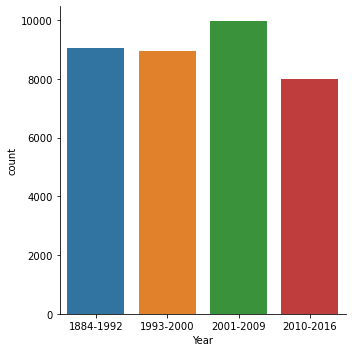

In [137]:
#insight_em = sns.catplot(data=cars,kind='count',x='Year',hue='Year')
#insight_em

insight_em = sns.catplot(data=cars,kind='count',x='Year')
insight_em

In [138]:
### your code is here

cars['City MPG'] = cars['City MPG'] / 3.78541
cars.rename(columns={"City MPG" : "City km/liter"}, inplace=True)
cars


,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City km/liter,Highway MPG,Combined MPG,CO2 Emission Grams/Km,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1884-1992,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,4.755099,17,17,324.831736,1950
1,AM General,FJ8c Post Office,1884-1992,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,3.434238,13,13,424.779962,2550
2,AM General,Post Office DJ5 2WD,1884-1992,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,4.226755,17,16,345.133719,2100
3,AM General,Post Office DJ8 2WD,1884-1992,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,3.434238,13,13,424.779962,2550
4,ASC Incorporated,GNX,1884-1992,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,3.698410,21,16,345.133719,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2010-2016,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,8.981854,38,36,151.614948,1100
35948,smart,fortwo coupe,2010-2016,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,8.981854,38,36,150.993575,1100
35949,smart,fortwo coupe,2010-2016,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,8.981854,38,36,151.614948,1100
35950,smart,fortwo coupe,2010-2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,8.981854,39,36,152.857693,1100


In [139]:
cars['City km/liter'].describe()

count    35952.000000
mean         4.661619
std          1.259929
min          1.585033
25%          3.962583
50%          4.490927
75%          5.283444
max         15.321986
Name: City km/liter, dtype: float64

In [140]:
cars["City km/liter"] = pd.qcut(cars["City km/liter"], [0, 0.2, 0.4, 0.6, 0.8, 1], labels=['1,5 - 4,34', '4,35 - 7,08', '7,09 - 9,83', "9,84 - 12,58","9,85 - 15,32"])
cars["City km/liter"]

0         7,09 - 9,83
1          1,5 - 4,34
2         4,35 - 7,08
3          1,5 - 4,34
4          1,5 - 4,34
             ...     
35947    9,85 - 15,32
35948    9,85 - 15,32
35949    9,85 - 15,32
35950    9,85 - 15,32
35951    9,85 - 15,32
Name: City km/liter, Length: 35952, dtype: category
Categories (5, object): ['1,5 - 4,34' < '4,35 - 7,08' < '7,09 - 9,83' < '9,84 - 12,58' < '9,85 - 15,32']

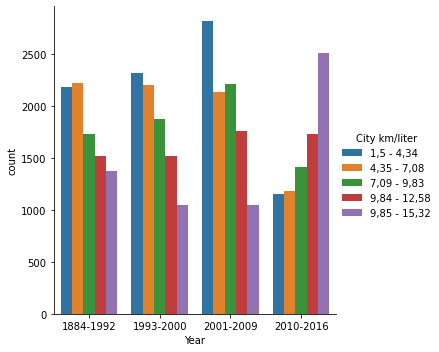

In [141]:
#insight_em = cars.groupby(["City km/liter","Year" ]).size().unstack().plot(kind='bar',stacked=False)
#xplt.show()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox

insight_em = sns.catplot(data=cars,kind='count',x='Year',hue='City km/liter')
insight_em

Which brands are more environment friendly?

In [142]:
### your code is here
cars['CO2 Emission Grams/Km'].describe()


count    35952.000000
mean       295.348614
std         73.981118
min         22.990791
25%        245.442231
50%        290.638922
75%        345.133719
max        788.877073
Name: CO2 Emission Grams/Km, dtype: float64

Does the drivetrain affect fuel consumption?

In [143]:
## Your Code here
cars["CO2 Emission Grams/Km"] = pd.qcut(cars["CO2 Emission Grams/Km"], [0, 0.2, 0.4, 0.6, 0.8, 1], labels=['22,9 - 176,1', '176,2 - 329,4', '329,5 - 482,5', "482,6 - 635,7","635,8 - 788,88"])
cars["CO2 Emission Grams/Km"]



0         482,6 - 635,7
1        635,8 - 788,88
2         482,6 - 635,7
3        635,8 - 788,88
4         482,6 - 635,7
              ...      
35947      22,9 - 176,1
35948      22,9 - 176,1
35949      22,9 - 176,1
35950      22,9 - 176,1
35951      22,9 - 176,1
Name: CO2 Emission Grams/Km, Length: 35952, dtype: category
Categories (5, object): ['22,9 - 176,1' < '176,2 - 329,4' < '329,5 - 482,5' < '482,6 - 635,7' < '635,8 - 788,88']

Do cars with automatic transmission consume more fuel than cars with manual transmission?

In [144]:
## Your Code here

Use `groupby` and `agg` with different aggregation measures for different columns:

aggregate with average City_Km/Liter and the count of the Trans

In [145]:
## your code is here

aggregate with average City_Km/Liter and the minimum of the Trans

In [146]:
### your code is here